In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:
def plot_sample(X,y,index):
    plt.figure(figsize= (2,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

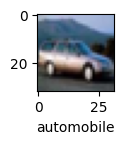

In [29]:
plot_sample(X_train,y_train, 4)

In [32]:
X_train = X_train/ 255.0
X_test = X_test/255.0

In [33]:
X_train[0][0:1]

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        [0.00104575, 0.00083045, 0.00064591],
        [0.00150711, 0.00112265, 0.00079969],
        [0.00183007, 0.00139946, 0.00096886],
        [0.00213764, 0.00164552, 0.0011534 ],
        [0.00222991, 0.00169166, 0.0012303 ],
        [0.00229143, 0.00179931, 0.0013687 ],
        [0.00229143, 0.00184544, 0.00143022],
        [0.00201461, 0.00158401, 0.00118416],
        [0.00192234, 0.00152249, 0.00116878],
        [0.00218378, 0.00176855, 0.00139946],
        [0.00221453, 0.00172241, 0.00132257],
        [0.00210688, 0.00161476, 0.00121492],
        [0.00198385, 0.00149173, 0.00109189],
        [0.00210688, 0.00163014, 0.00121492],
        [0.00206075, 0.00163014, 0.00116878],
        [0.00190696, 0.00149173, 0.00098424],
        [0.00213764, 0.00173779, 0.00119954],
        [0.00213764, 0.00172241, 0.0011534 ],
        [0.00204537, 0.00161476, 0

In [35]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

2024-08-31 22:30:22.063356: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 228s 145ms/step - accuracy: 0.2599 - loss: 1.9899
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 147ms/step - accuracy: 0.3836 - loss: 1.7050
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 147ms/step - accuracy: 0.4260 - loss: 1.6003
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 230s 147ms/step - accuracy: 0.4528 - loss: 1.5207
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 230s 147ms/step - accuracy: 0.4750 - loss: 1.4646


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)

  4/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step  

2024-08-31 22:52:47.120838: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [42]:
y_pred_class = [np.argmax(ele) for ele in y_pred]
print("classification_report: \n", classification_report(y_test, y_pred_class))

classification_report: 
               precision    recall  f1-score   support

           0       0.56      0.54      0.55      1000
           1       0.64      0.58      0.61      1000
           2       0.33      0.39      0.35      1000
           3       0.32      0.44      0.37      1000
           4       0.54      0.13      0.21      1000
           5       0.44      0.27      0.34      1000
           6       0.37      0.77      0.50      1000
           7       0.65      0.41      0.50      1000
           8       0.65      0.57      0.61      1000
           9       0.52      0.60      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [57]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [58]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
cnn.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 123ms/step - accuracy: 0.0995 - loss: 2.3031
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 122ms/step - accuracy: 0.1015 - loss: 2.3027
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 122ms/step - accuracy: 0.1012 - loss: 2.3027
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 124ms/step - accuracy: 0.0966 - loss: 2.3028
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 121ms/step - accuracy: 0.0987 - loss: 2.3028


In [60]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.1027 - loss: 2.3026


[2.30261492729187, 0.10000000149011612]

In [62]:
y_pred1 = cnn.predict(X_test)
y_pred1[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


array([[0.49823484, 0.49870124, 0.4986437 , 0.49728882, 0.50218296,
        0.4997723 , 0.50152177, 0.49974462, 0.50361305, 0.49776515],
       [0.49823484, 0.49870124, 0.4986437 , 0.49728882, 0.50218296,
        0.4997723 , 0.50152177, 0.49974462, 0.50361305, 0.49776515],
       [0.49823484, 0.49870124, 0.4986437 , 0.49728882, 0.50218296,
        0.4997723 , 0.50152177, 0.49974462, 0.50361305, 0.49776515],
       [0.49823484, 0.49870124, 0.4986437 , 0.49728882, 0.50218296,
        0.4997723 , 0.50152177, 0.49974462, 0.50361305, 0.49776515],
       [0.49823484, 0.49870124, 0.4986437 , 0.49728882, 0.50218296,
        0.4997723 , 0.50152177, 0.49974462, 0.50361305, 0.49776515]],
      dtype=float32)

In [67]:
y_pred_cnn = [np.argmax(ele) for ele in y_pred1]
y_pred_cnn[3000:3010]

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

In [65]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)